In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# importing sys
import sys
# adding Folder_2/subfolder to the system path
sys.path.insert(0, '/Users/glover.co/Documents/laszlo/NetDesign')
import network_design as nd
import time
from matplotlib.colors import to_rgba


In [2]:
np.logspace(1,4,20,dtype=int)

array([   10,    14,    20,    29,    42,    61,    88,   127,   183,
         263,   379,   545,   784,  1128,  1623,  2335,  3359,  4832,
        6951, 10000])

In [17]:
X = nd.create_labels(np.array([500,500]))

In [18]:
O = np.array([[0,2],[2,0]])

In [29]:
test = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False,system_energy=1)

In [35]:
start = time.time()
test.run(10000,component=False,link_strength=.5)
print(f'Graph Tool Time - {time.time() - start}')

Graph Tool Time - 63.13657212257385


In [31]:
comp1 = [0]
comp2 = [2]
neighbor_matrix = test.A@test.X
max_neighbor_matrix = test.X@test.O
neighbor_count = {i: max_neighbor_matrix[X[i].argmax()] - neighbor_matrix[i] for i in np.append(comp1,comp2)}
neighbor_count, max_neighbor_matrix[X[1].argmax()] - neighbor_matrix[1]

({0: array([0., 0.]), 2: array([0., 2.])}, array([0., 0.]))

In [32]:
max_neighbor_matrix

array([[0., 2.],
       [0., 2.],
       [0., 2.],
       ...,
       [2., 0.],
       [2., 0.],
       [2., 0.]])

/Users/glover.co/anaconda3/lib/python3.11/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


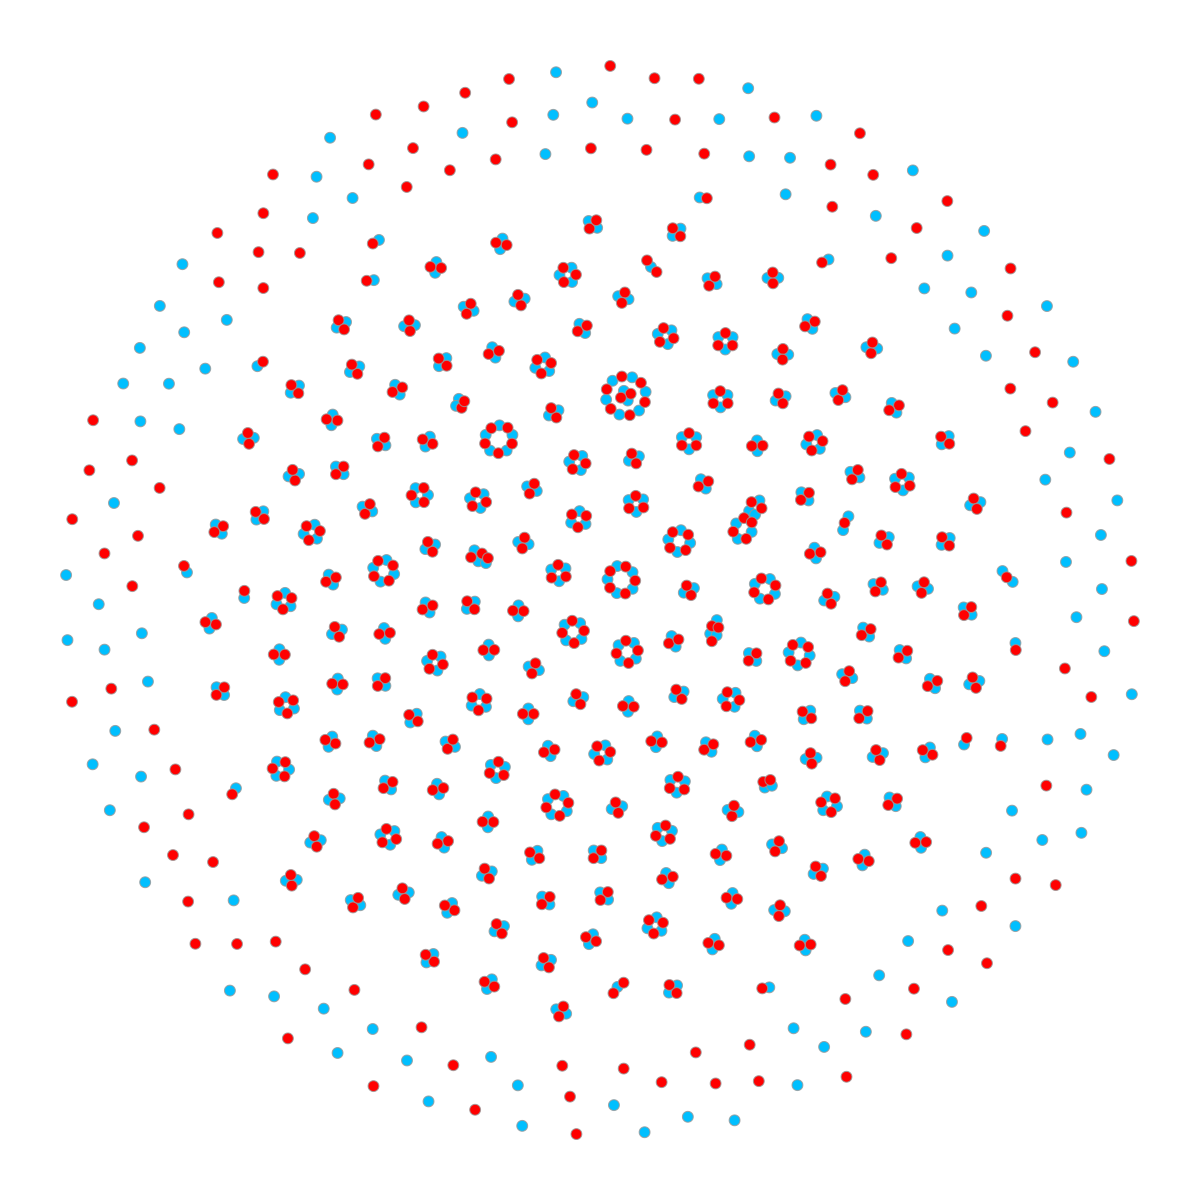

<Figure size 500x500 with 0 Axes>

In [33]:
test.draw(with_networkx=False,node_size=10,color_key=[to_rgba('deepskyblue'),to_rgba('red')])

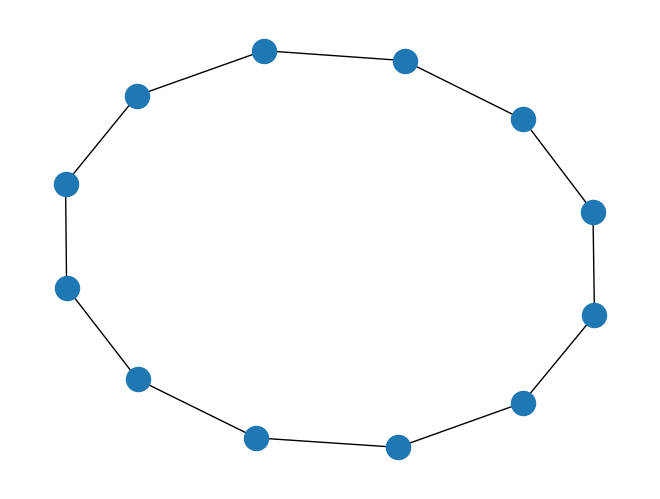

In [25]:
nx.draw(h)

In [24]:
# Get largest connected component
h = nx.subgraph(test.g,sorted(list(nx.connected_components(test.g)),key=len,reverse=True)[0])

In [26]:
np.exp(-.5*(X@O - A@X)[list(sorted(list(nx.connected_components(test.g)),key=len,reverse=True)[0])].sum(axis=1)
                        )

NameError: name 'A' is not defined

(array([180.,  12.,   0.,   4.,   0., 126.,   0.,   0.,   0.,  30.,   0.,
          0.,   7.,   0.,   0.,   0.,   2.,   0.,   0.,   2.]),
 array([ 1.  ,  1.55,  2.1 ,  2.65,  3.2 ,  3.75,  4.3 ,  4.85,  5.4 ,
         5.95,  6.5 ,  7.05,  7.6 ,  8.15,  8.7 ,  9.25,  9.8 , 10.35,
        10.9 , 11.45, 12.  ]),
 <BarContainer object of 20 artists>)

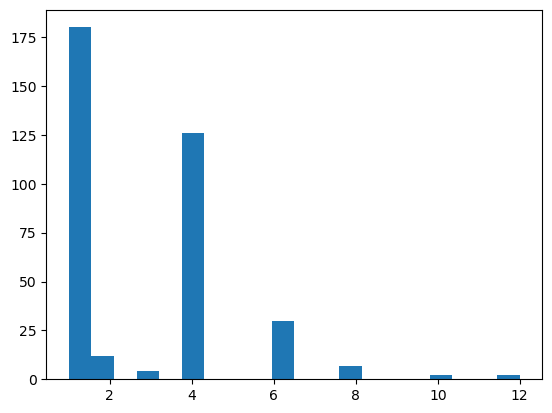

In [34]:
#plot distribution of component sizes
components = [c for c in nx.connected_components(test.g)]
plt.hist([len(c) for c in components],bins=20)

In [27]:
comp1, comp2 = np.random.choice(list(nx.connected_components(test.g)),size=2,replace=False)

In [28]:
np.random.shuffle(comp1)
np.random.shuffle(comp2)

/var/folders/8t/4z1vq2xd5790h0y5jrvphttr0000gp/T/ipykernel_38504/50420924.py:1: UserWarning: you are shuffling a 'set' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(comp1)
/var/folders/8t/4z1vq2xd5790h0y5jrvphttr0000gp/T/ipykernel_38504/50420924.py:2: UserWarning: you are shuffling a 'set' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(comp2)


In [29]:
neighbors, neighbortypes, offsets = test.build_adjacency_list()

In [31]:
nd.compute_viable_pairs_and_possible_links(comp1,comp2,test.X,test.O,neighbors,offsets,np.zeros((len(comp1)*len(comp2),2),dtype=int),np.zeros((len(comp1)*len(comp2),2),dtype=int))

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(reflected set(int64), int64)
 
There are 22 candidate implementations:
[1m      - Of which 22 did not match due to:
      Overload of function 'getitem': File: <numerous>: Line N/A.
        With argument(s): '(reflected set(int64), int64)':[0m
[1m       No match.[0m
[0m
[0m[1mDuring: typing of intrinsic-call at /Users/glover.co/Documents/laszlo/NetDesign/network_design.py (230)[0m
[1m
File "../network_design.py", line 230:[0m
[1mdef compute_viable_pairs_and_possible_links(comp1, comp2, X, O, neighbors, offsets, viable_pairs, possible_pairs):
    <source elided>
    for u in nb.prange(len(comp1)):
[1m        e1 = comp1[u]
[0m        [1m^[0m[0m


In [35]:
(A@X)[0]

array([0., 2.])

In [32]:
test = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False)

In [33]:
# start = time.time()
# print(f'NetworkX Time - {time.time() - start}')
# Remove all edges from nodes in list
nodes_to_remove_edges_from = [0,1,2,3,4,5,6,7,8,9]


/home/glover.co/miniconda3/envs/gt/lib/python3.12/site-packages/graph_tool/draw/cairo_draw.py:681: UserWarning: Unknown parameter: node_size
  warnings.warn("Unknown parameter: " + k, UserWarning)


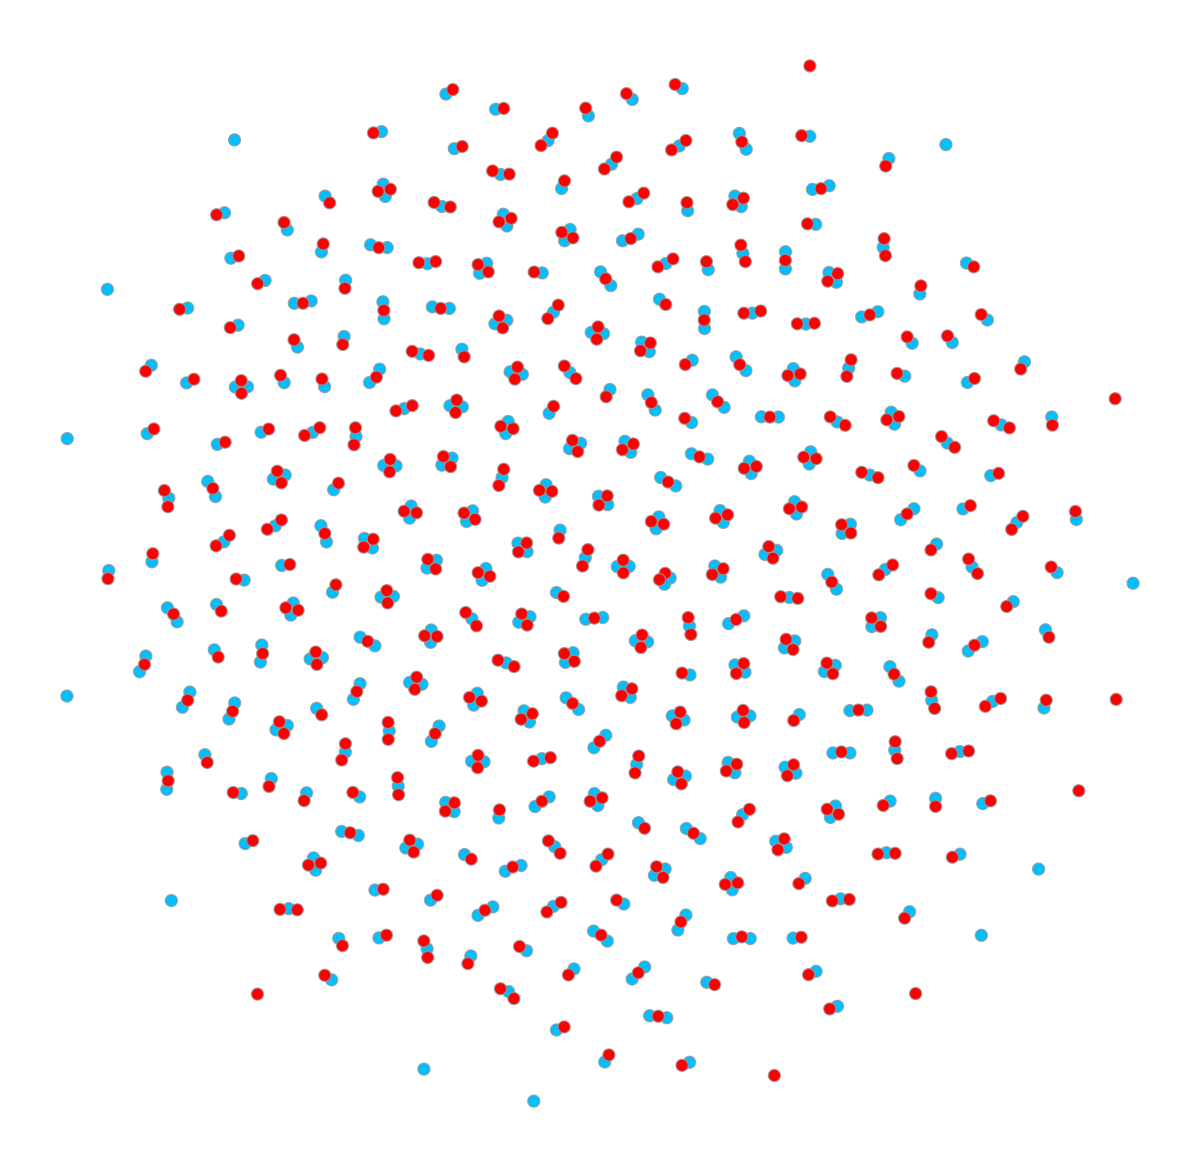

<Figure size 500x500 with 0 Axes>

In [20]:
# for i in range(100):
#     test.run(1,component=False,detachment_rate=0)
test.draw(node_size=10,color_key=[to_rgba('deepskyblue'),to_rgba('red')],with_networkx=False)

In [28]:
O = np.array([[0,2],[2,0]])
I = np.array([[1,0],[1,0],[0,1],[0,1]])
X = np.tile(I,(200,1))
over_time = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False,system_energy=2)

In [29]:
component_size = np.zeros(500)
counts = np.zeros((500,4))
for t in range(500):
    over_time.run(50,component=True,detachment_rate=0,connection_method='probabilistic')
    components = list(nx.connected_components(over_time.g))
    component_size[t] = np.mean([len(x) for x in list(nx.connected_components(over_time.g))])
    counts[t] = np.histogram([len(x) for x in components],range=(1,5),bins=4)[0]

In [4]:
counts

array([[192.,   4.,   0.,   0.],
       [186.,   7.,   0.,   0.],
       [186.,   7.,   0.,   0.],
       ...,
       [139.,  21.,   1.,   4.],
       [141.,  20.,   1.,   4.],
       [143.,  19.,   1.,   4.]])

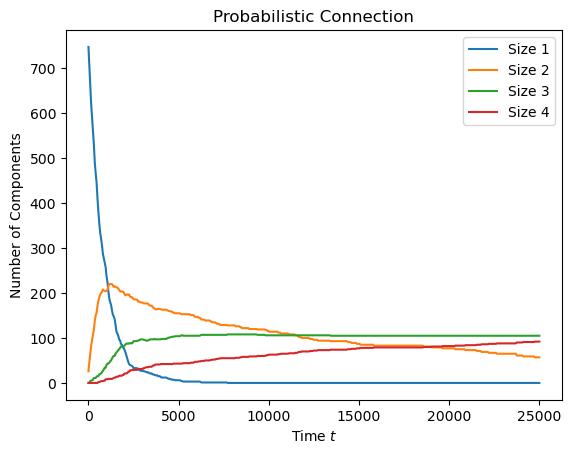

In [31]:
plt.plot(np.linspace(1,500*50,500)[:500],counts[:500,0],label='Size 1')
plt.plot(np.linspace(1,500*50,500)[:500],counts[:500,1],label='Size 2')
plt.plot(np.linspace(1,500*50,500)[:500],counts[:500,2],label='Size 3')
plt.plot(np.linspace(1,500*50,500)[:500],counts[:500,3],label='Size 4')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Number of Components')
plt.title('Probabilistic Connection')
plt.show()

<BarContainer object of 4 artists>

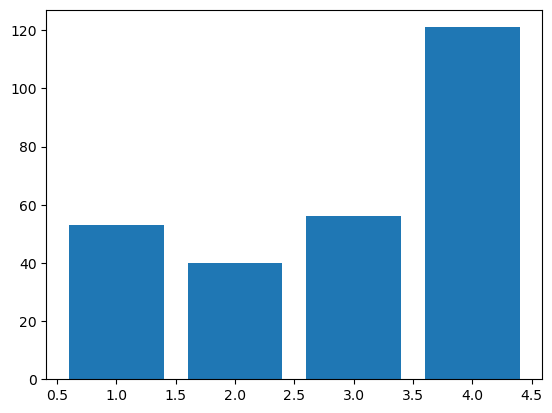

In [16]:
plt.bar(np.arange(1,5),counts[-1])

In [ ]:
from matplotlib import animation


def barlist(n): 
    return counts[n]

fig=plt.figure()

n=500 #Number of frames
x=range(1,5)
barcollection = plt.bar(x,np.arange(1,5)*barlist(0))

def animate(i):
    y=np.arange(1,5)*barlist(i)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=n,
                             interval=100)

# anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
from IPython.display import HTML
HTML(anim.to_jshtml())
# anim.save('maximal.mp4')

In [25]:
over_time = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False)
blue_deg = np.zeros(500)
red_deg = np.zeros(500)
for t in range(500):
    over_time.run(10,component=False,detachment_rate=0)
    deg = np.array(over_time.g.degree())[:,1]
    blue_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==0)[0]])
    red_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==1)[0]])

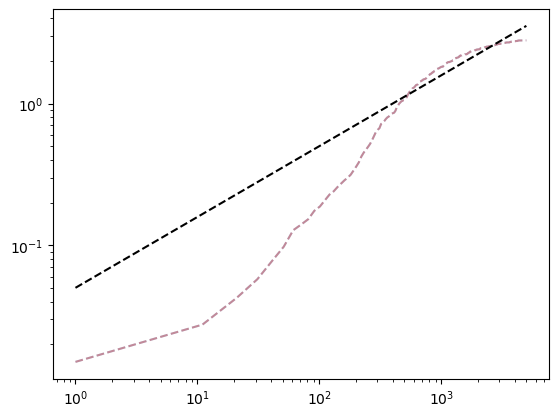

In [28]:
plt.plot(np.linspace(1,5000,500),blue_deg,'--',color='deepskyblue',alpha=.4)
plt.loglog(np.linspace(1,5000,500),red_deg,'--',color='r',alpha=.4)
plt.loglog(np.linspace(1,5000,500),np.linspace(1,5000,500)**(1/2)/20,'--',color='k')

In [70]:
# Random O
O = np.random.randint(0,10,size=(4,4))

In [71]:
labels = np.random.randint(0,4,size=1000)
X = np.zeros((1000,4),dtype=int)
X[np.arange(1000),labels]=1

In [72]:
test = nd.NetAssembly(X,O,X.sum(axis=1))


In [75]:
test.run(10000,component=True,detachment_rate=0)

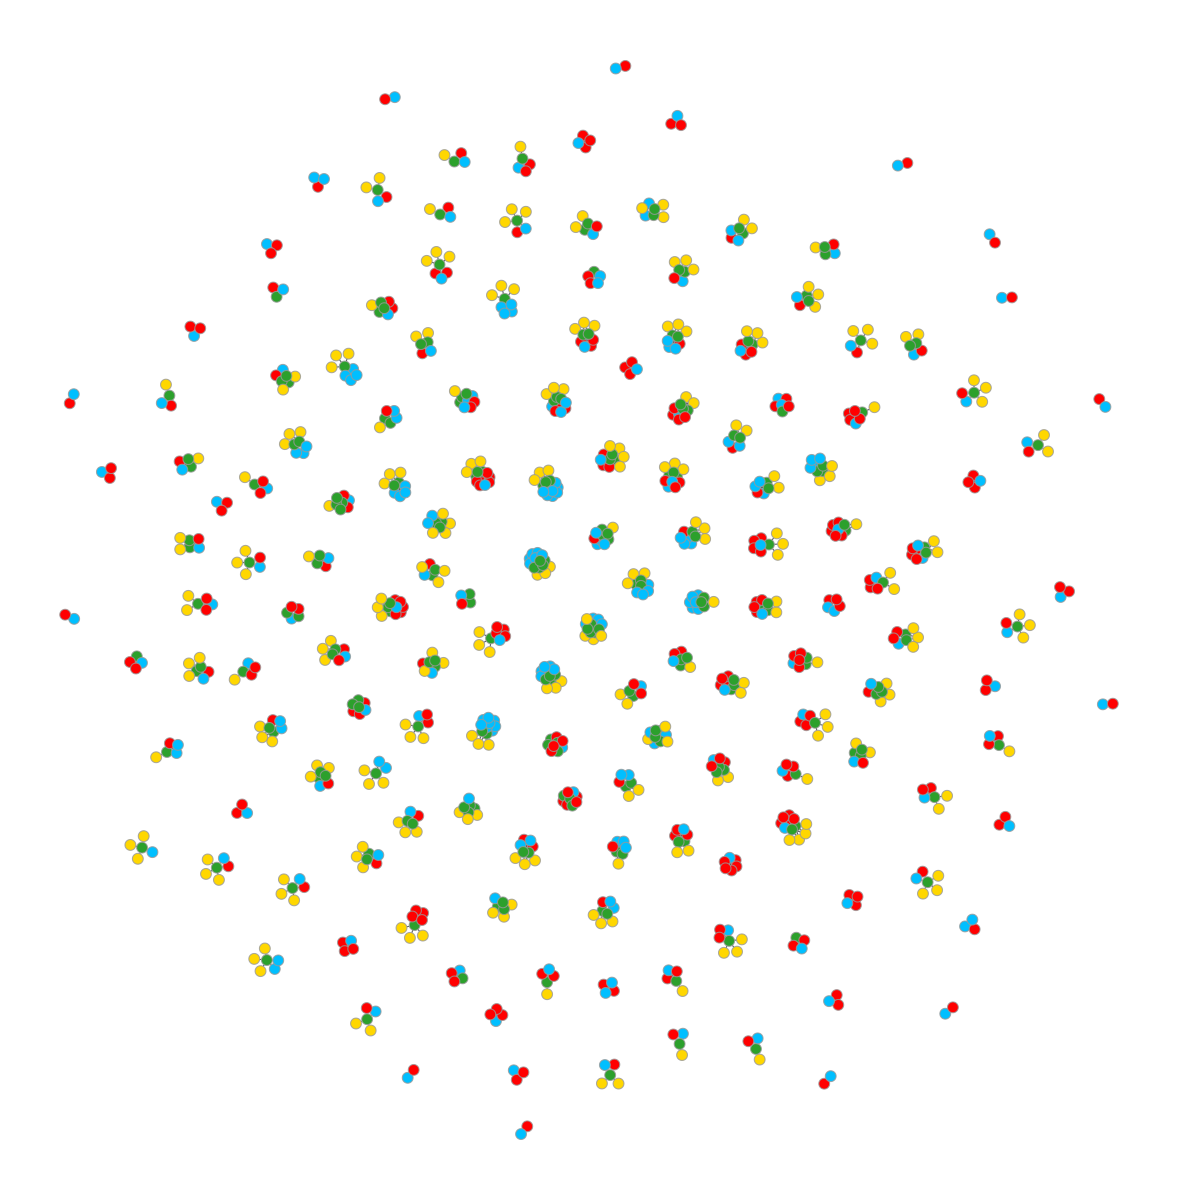

<Figure size 500x500 with 0 Axes>

In [76]:
test.draw(node_size=5,color_key=[to_rgba('deepskyblue'),to_rgba('red'),to_rgba('gold'),to_rgba('tab:green')],with_networkx=False)

In [77]:
component_size = np.zeros(5000)
over_time = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False)
for t in range(5000):
    over_time.run(10,component=False,detachment_rate=0)
    components = list(nx.connected_components(over_time.g))
    component_size[t] = np.mean([len(x) for x in list(nx.connected_components(over_time.g))])

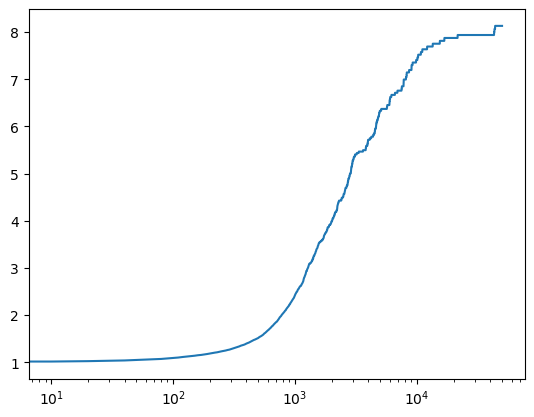

In [81]:
plt.semilogx(np.arange(0,50000,10),component_size)

In [82]:
over_time = nd.NetAssembly(X,O,X.sum(axis=0,dtype=int),graph_tool=False)
blue_deg = np.zeros(5000)
red_deg = np.zeros(5000)
yellow_deg = np.zeros(5000)
green_deg = np.zeros(5000)
for t in range(5000):
    over_time.run(10,component=False,detachment_rate=0)
    deg = np.array(over_time.g.degree())[:,1]
    blue_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==0)[0]])
    red_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==1)[0]])
    yellow_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==2)[0]])
    green_deg[t] = np.mean(deg[np.where(X.argmax(axis=1)==3)[0]])

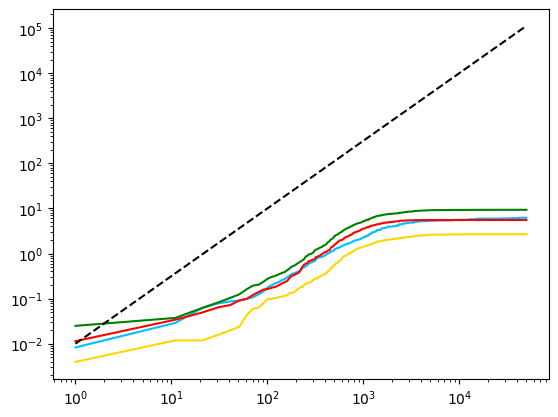

In [94]:
plt.plot(np.arange(1,50000,10),blue_deg,color='deepskyblue')
plt.plot(np.arange(1,50000,10),red_deg,color='r')
plt.loglog(np.arange(1,50000,10),yellow_deg,color='gold')
plt.plot(np.arange(1,50000,10),green_deg,color='g')
plt.plot(np.arange(1,50000,10),np.arange(1,50000,10)**(3/2)/100,'--',color='k')

In [21]:
import graph_tool.all as gt

In [7]:
g = gt.Graph(directed=False)
g.add_vertex(X.shape[0])
label_property = g.new_vertex_property("int")
g.vp.label = label_property
            # Assign node labels
for i, v in enumerate(g.vertices()):
    label_property[v] = X[i].argmax()
g.add_edge_list([[0,1],[1,2]])

In [8]:
comp, hist = gt.label_components(g)
g.vp.comp = comp

In [20]:
gt.graph_draw(test.g,vertex_text=test.g.vertex_index)

AttributeError: 'Graph' object has no attribute 'vertex_index'

In [9]:
g.remove_edge((0,1))

In [13]:
[int(v) for v in g.vertices() if g.vp.comp[v] == 197]

[199]

In [7]:
start = time.time()
g = nd.simulate(X,O,detachment_rate=0.01,T=1000)
print(time.time() - start)

0.1517627239227295


In [21]:
def colors(X):
    color = []
    for i in range(len(X)):
        if np.where(X[i] == 1)[0][0] == 0:
            color.append('r')
        elif np.where(X[i] == 1)[0][0] == 2:
            color.append('gold')
        elif np.where(X[i] == 1)[0][0] == 1:
            color.append('deepskyblue')
        else:
            color.append('darkgreen')
    return color

In [7]:
neighbors, offsets = nd.build_adjacency_list(g,g.number_of_nodes())

NameError: name 'g' is not defined


KeyboardInterrupt



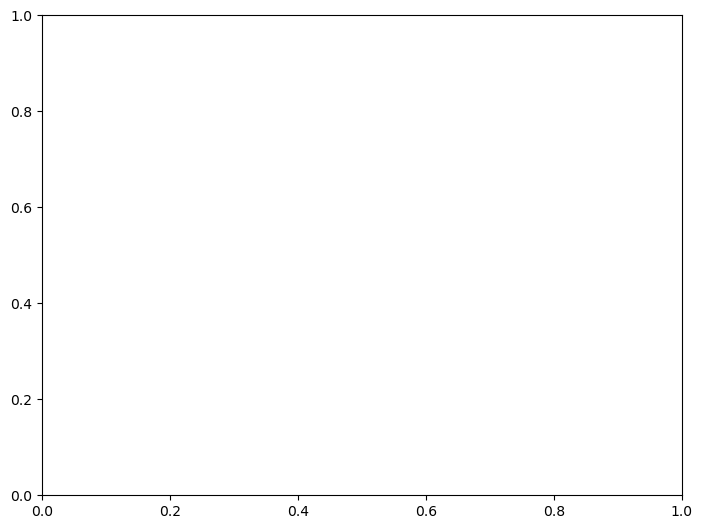

In [22]:
nx.draw(test.g,node_color=colors(test.X),node_size=10,with_labels=False,font_size=8)

In [48]:
neighbors[offsets[1]:offsets[2]]

array([18, 13], dtype=int32)

In [16]:
g = nx.Graph()
g.add_edges_from([[0,1],[0,2],[1,2],[0,3],[3,4],[4,5],[4,6],[5,6]])

In [17]:
X = nd.label_network(g)

In [20]:
O = nd.extract_O(g,X)

In [5]:
g.neighbors()

TypeError: Graph.neighbors() missing 1 required positional argument: 'n'

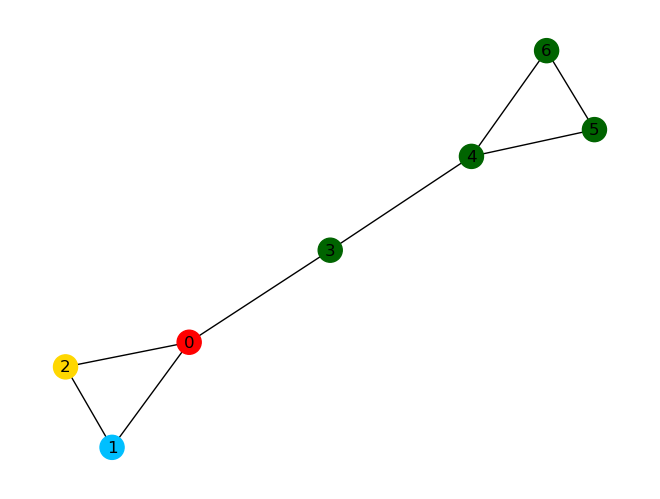

In [21]:
nx.draw(g,node_color=colors(X),with_labels=True)

In [22]:
O

array([[0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 1., 0.]])

In [23]:
X = nd.create_labels(np.array([20 for _ in range(O.shape[1])]))

In [33]:
new_g = nd.simulate(X,O,T=3000,detachment_rate=0.01)

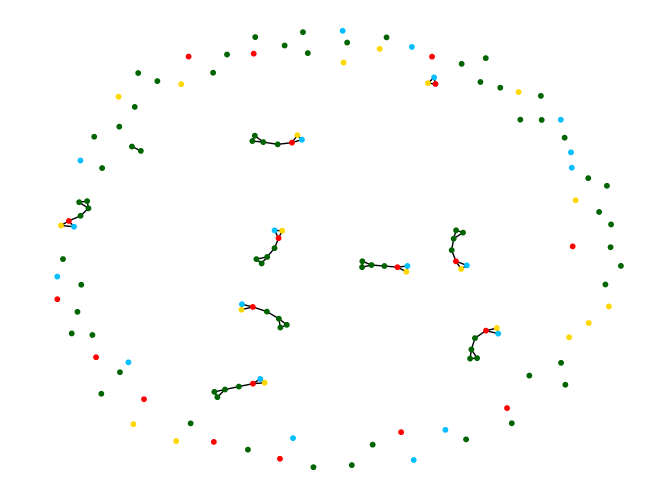

In [34]:
nx.draw(new_g,node_size=10,node_color=colors(X))